# This is a sentimental analysis project sourced from https://www.kaggle.com/datasets/aashita/nyt-comments. I modified the data to do a polarity analysis on the snippents of NYT reports in April 2017.

# Loading data and modification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Article.csv')
# Select only a single column with comments for our analysis
df = pd.DataFrame(data["snippet"]) 
# Rename the column to Comments
df.rename(columns={"snippet":"Comments"}, inplace=True)
df.head()

,Comments
0,One of the largest photo displays in Times his...
1,Meet the gang from under the bus.
2,A court ruling annulling the legislature’s aut...
3,"For two decades, until 2013, North Carolina en..."
4,In which Howard Barkin and Will Shortz teach u...


# Perform Sentiment Analysis on our data
**Calculating the sentiment polarity: 
Text polarity is a basic text processing technique that gives us insight into how positive or negative a text is. The polarity of a text is essentially it’s “sentiment” rating from -1 to 1.**

In [2]:
from textblob import TextBlob
# Create a new column 'Polarity' and compute the sentiments of the Comment column.
df['Polarity'] = df['Comments'].apply(lambda p: TextBlob(str(p)).sentiment.polarity)
df['Polarity'].head()

0    0.0
1    0.0
2   -0.6
3    0.0
4    0.0
Name: Polarity, dtype: float64

# Classification of sentiments as (Positive, Neutral, or Negetive)

In [4]:
df['Sentiment'] = df['Polarity'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negetive'))
df[['Comments', 'Polarity','Sentiment']].head()

,Comments,Polarity,Sentiment
0,One of the largest photo displays in Times his...,0.0,Neutral
1,Meet the gang from under the bus.,0.0,Neutral
2,A court ruling annulling the legislature’s aut...,-0.6,Negetive
3,"For two decades, until 2013, North Carolina en...",0.0,Neutral
4,In which Howard Barkin and Will Shortz teach u...,0.0,Neutral


# Looking at only Positive comments

In [5]:
df[df['Sentiment'] == 'Positive'].head()

,Comments,Polarity,Sentiment
8,"Getting rid of mice isn’t easy, but it’s a co-...",0.433333,Positive
11,"In modern youth baseball, the fundamentals are...",0.200000,Positive
13,"We’re on high alert for anti-Semitism, but the...",0.048571,Positive
14,"Many Trump officials — friends, family members...",0.250000,Positive
15,"“You’re so lucky,” my son said to me. “People ...",0.083333,Positive


# Looking at only Nuetral comments

In [6]:
df[df['Sentiment'] == 'Neutral'].head()

,Comments,Polarity,Sentiment
0,One of the largest photo displays in Times his...,0.0,Neutral
1,Meet the gang from under the bus.,0.0,Neutral
3,"For two decades, until 2013, North Carolina en...",0.0,Neutral
4,In which Howard Barkin and Will Shortz teach u...,0.0,Neutral
5,"In this visually ravishing production, Bobby C...",0.0,Neutral


# Looking at only Negetive comments

In [7]:
df[df['Sentiment'] == 'Negetive'].head()

,Comments,Polarity,Sentiment
2,A court ruling annulling the legislature’s aut...,-0.600000,Negetive
6,"For the author, this gleaming, complex city in...",-0.150000,Negetive
16,Bro C.E.O.s like the head of Uber will keep de...,-0.200000,Negetive
18,Raging lust. Boiling anger. Imperious authorit...,-0.700000,Negetive
31,“The Walking Dead” wrapped up Season 7 with a ...,-0.031818,Negetive


# Lets Visualize the results of our sentiment analysis in a pie chat

<Axes: title={'center': 'Polarity Score of Comments'}, ylabel='count'>

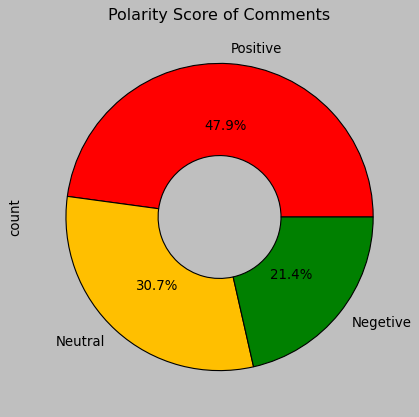

In [8]:
sentiment = df['Sentiment'].value_counts()

color_pallete = ['red', (1.0, 0.75, 0.0), 'green']
plt.style.use('classic')
sentiment.plot(kind = 'pie', title = 'Polarity Score of Comments',colors = color_pallete, autopct='%1.1f%%', wedgeprops = dict(width=0.6))

# Creating a Word Cloud all comments

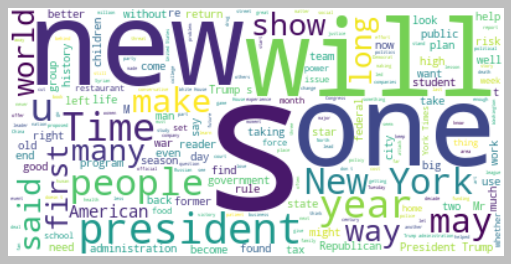

In [10]:
from wordcloud import WordCloud
text = ''.join(comment for comment in df['Comments'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8,10))
plt.axis('off')
plt.imshow(wordcloud);